In [1]:
import os
HOME = os.getcwd()
print(HOME)

/home/nitro/Studia/Wizja Komputerowa/ProjektV2


In [2]:

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.237 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 7974MiB)
Setup complete ✅ (16 CPUs, 30.7 GB RAM, 32.1/77.4 GB disk)


In [1]:
! pip install ultralytics

  Using cached ultralytics-8.0.237-py3-none-any.whl.metadata (39 kB)
Using cached ultralytics-8.0.237-py3-none-any.whl (691 kB)

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [3]:
from ultralytics import YOLO
from IPython.display import display, Image

## Custom Training

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="U22b93cUm1F7NFbp9wCj")
project = rf.workspace("poltechnika-gdaska").project("legov2")
dataset = project.version(1).download("yolov8")



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.237, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to LegoV2-1 in yolov8:: 100%|██████████| 3706/3706 [00:00<00:00, 10072.33it/s]


In [9]:
!yolo task=detect mode=train model=yolov8s.pt data=LegoV2-1/data.yaml epochs=300 imgsz=640 plots=True batch = 32

New https://pypi.org/project/ultralytics/8.0.238 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.237 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 7974MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=LegoV2-1/data.yaml, epochs=300, time=None, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None,

In [10]:
!ls {HOME}/runs/detect/train9/

ls: nie ma dostępu do 'Komputerowa/ProjektV2/runs/detect/train9/': Nie ma takiego pliku ani katalogu
/home/nitro/Studia/Wizja:


/home/nitro/Studia/Wizja Komputerowa/ProjektV2


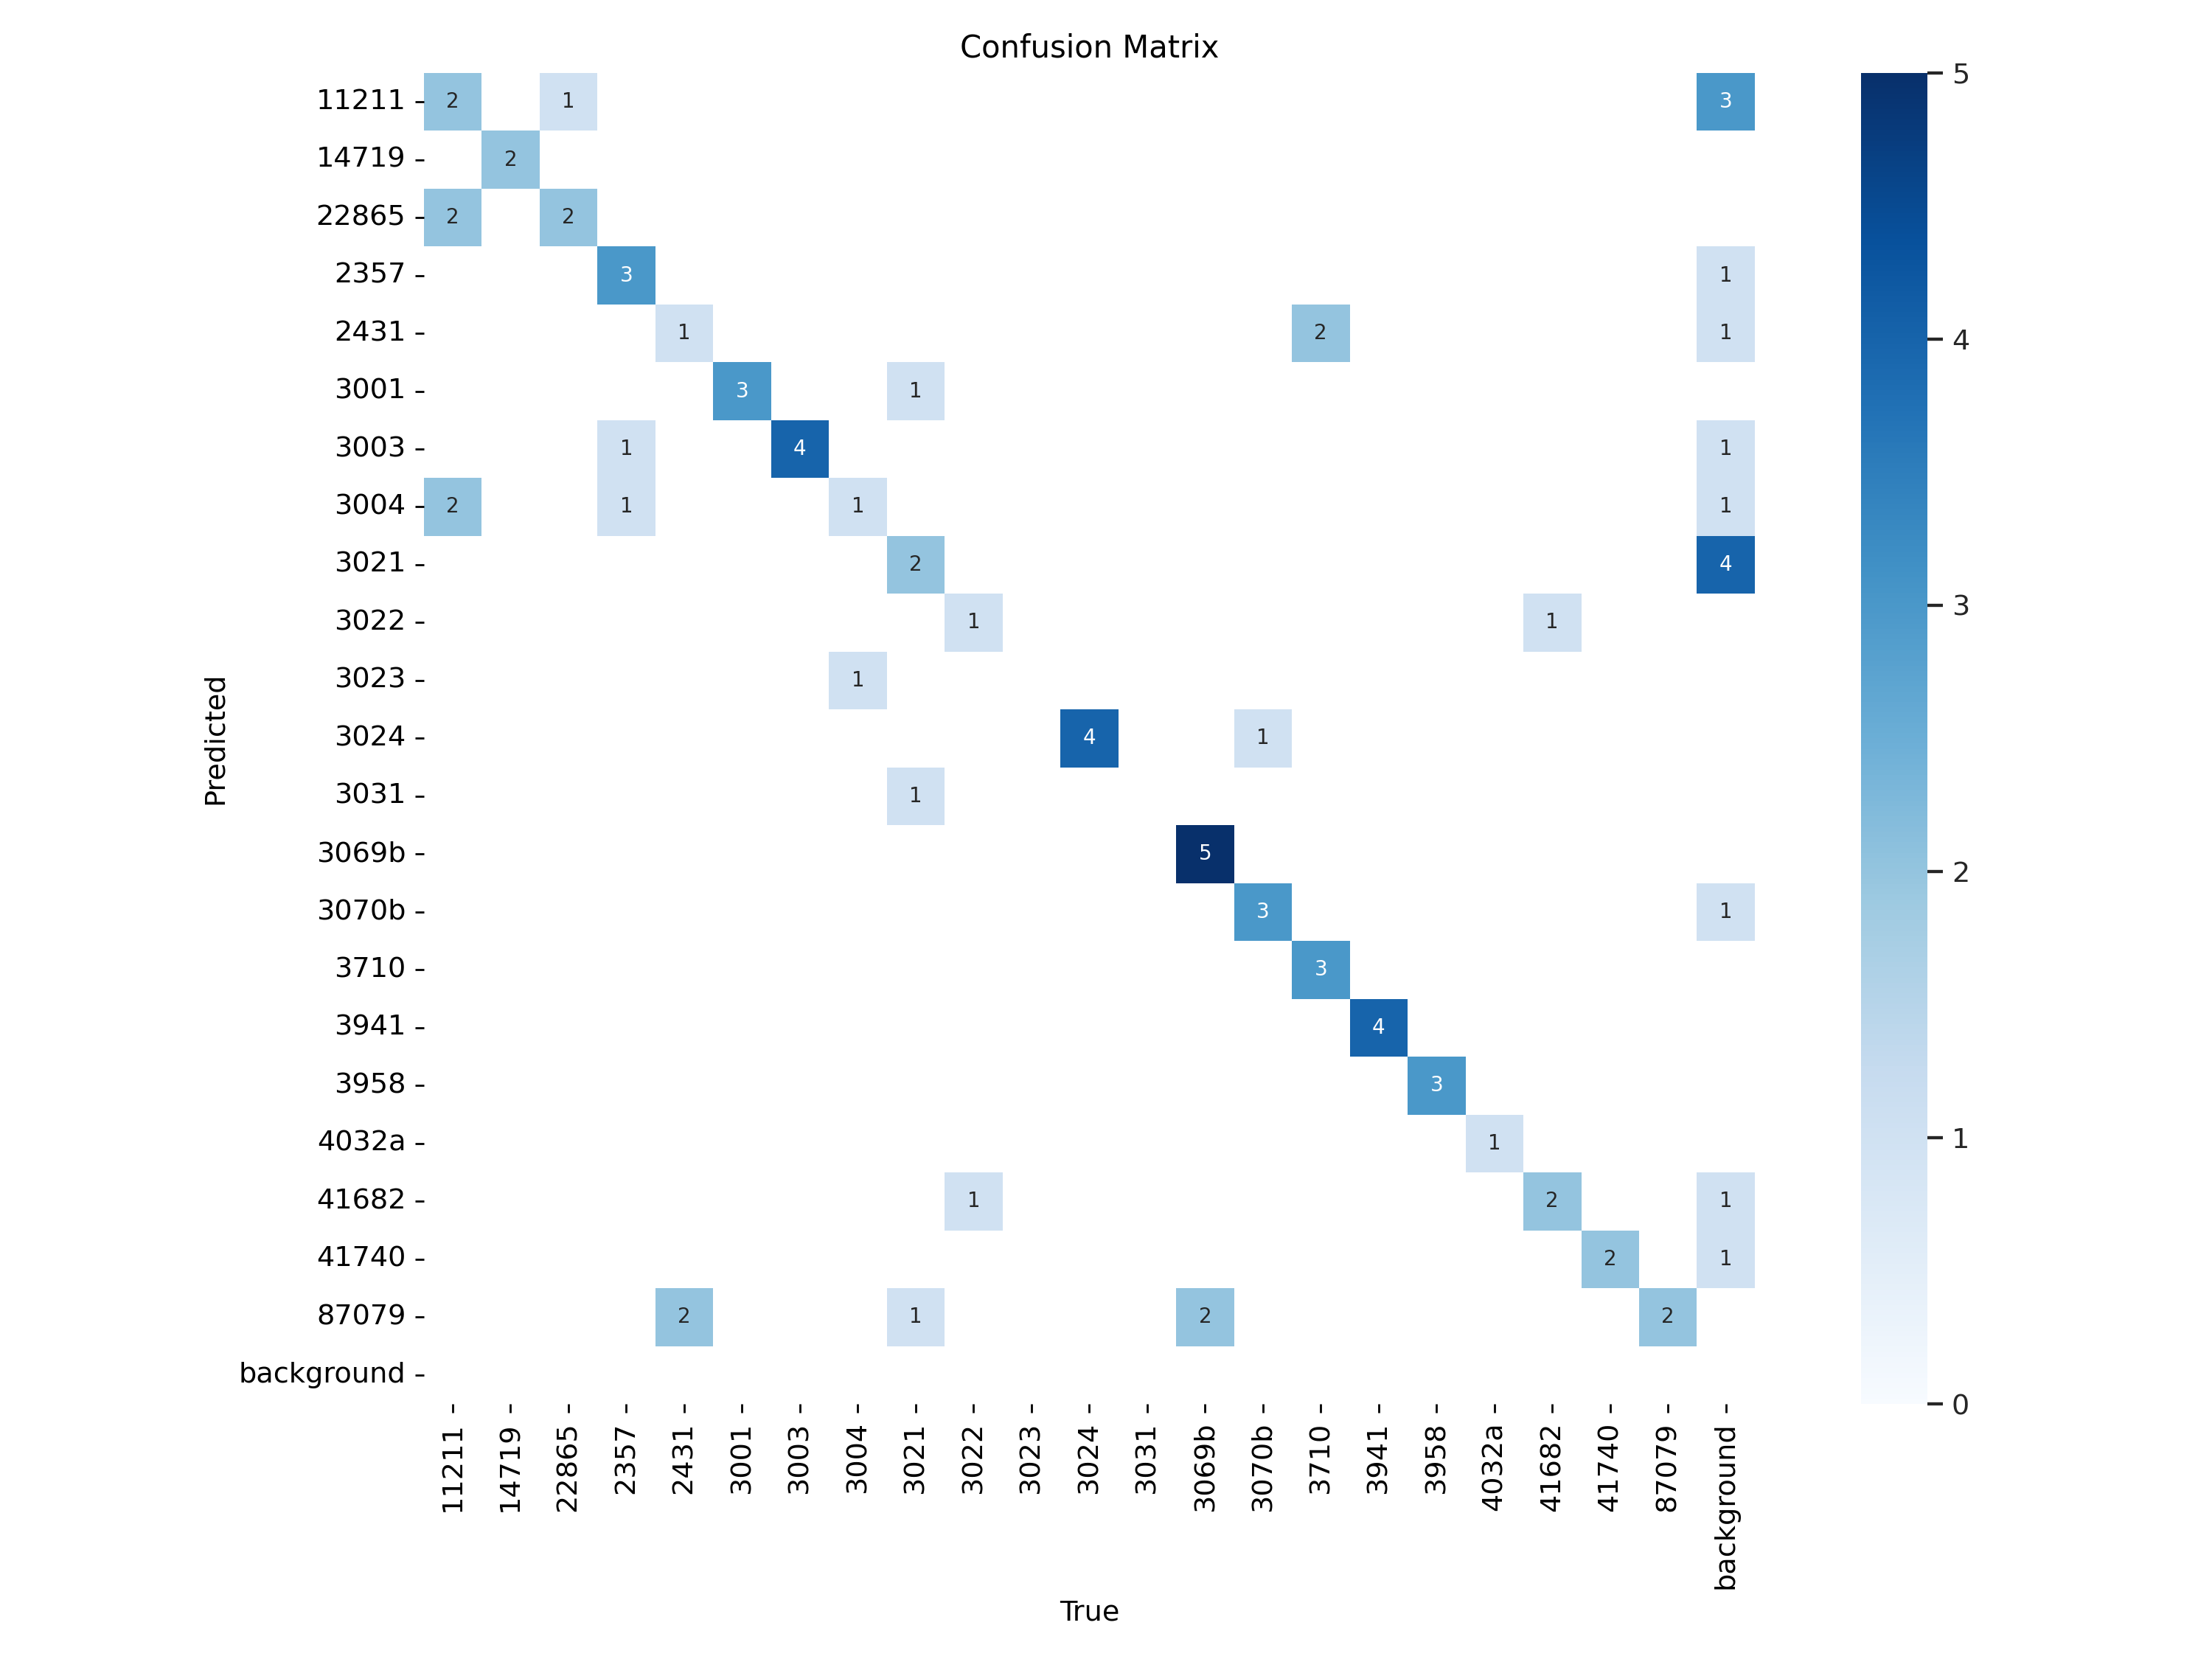

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train9/confusion_matrix.png', width=600)

/home/nitro/Studia/Wizja Komputerowa/ProjektV2


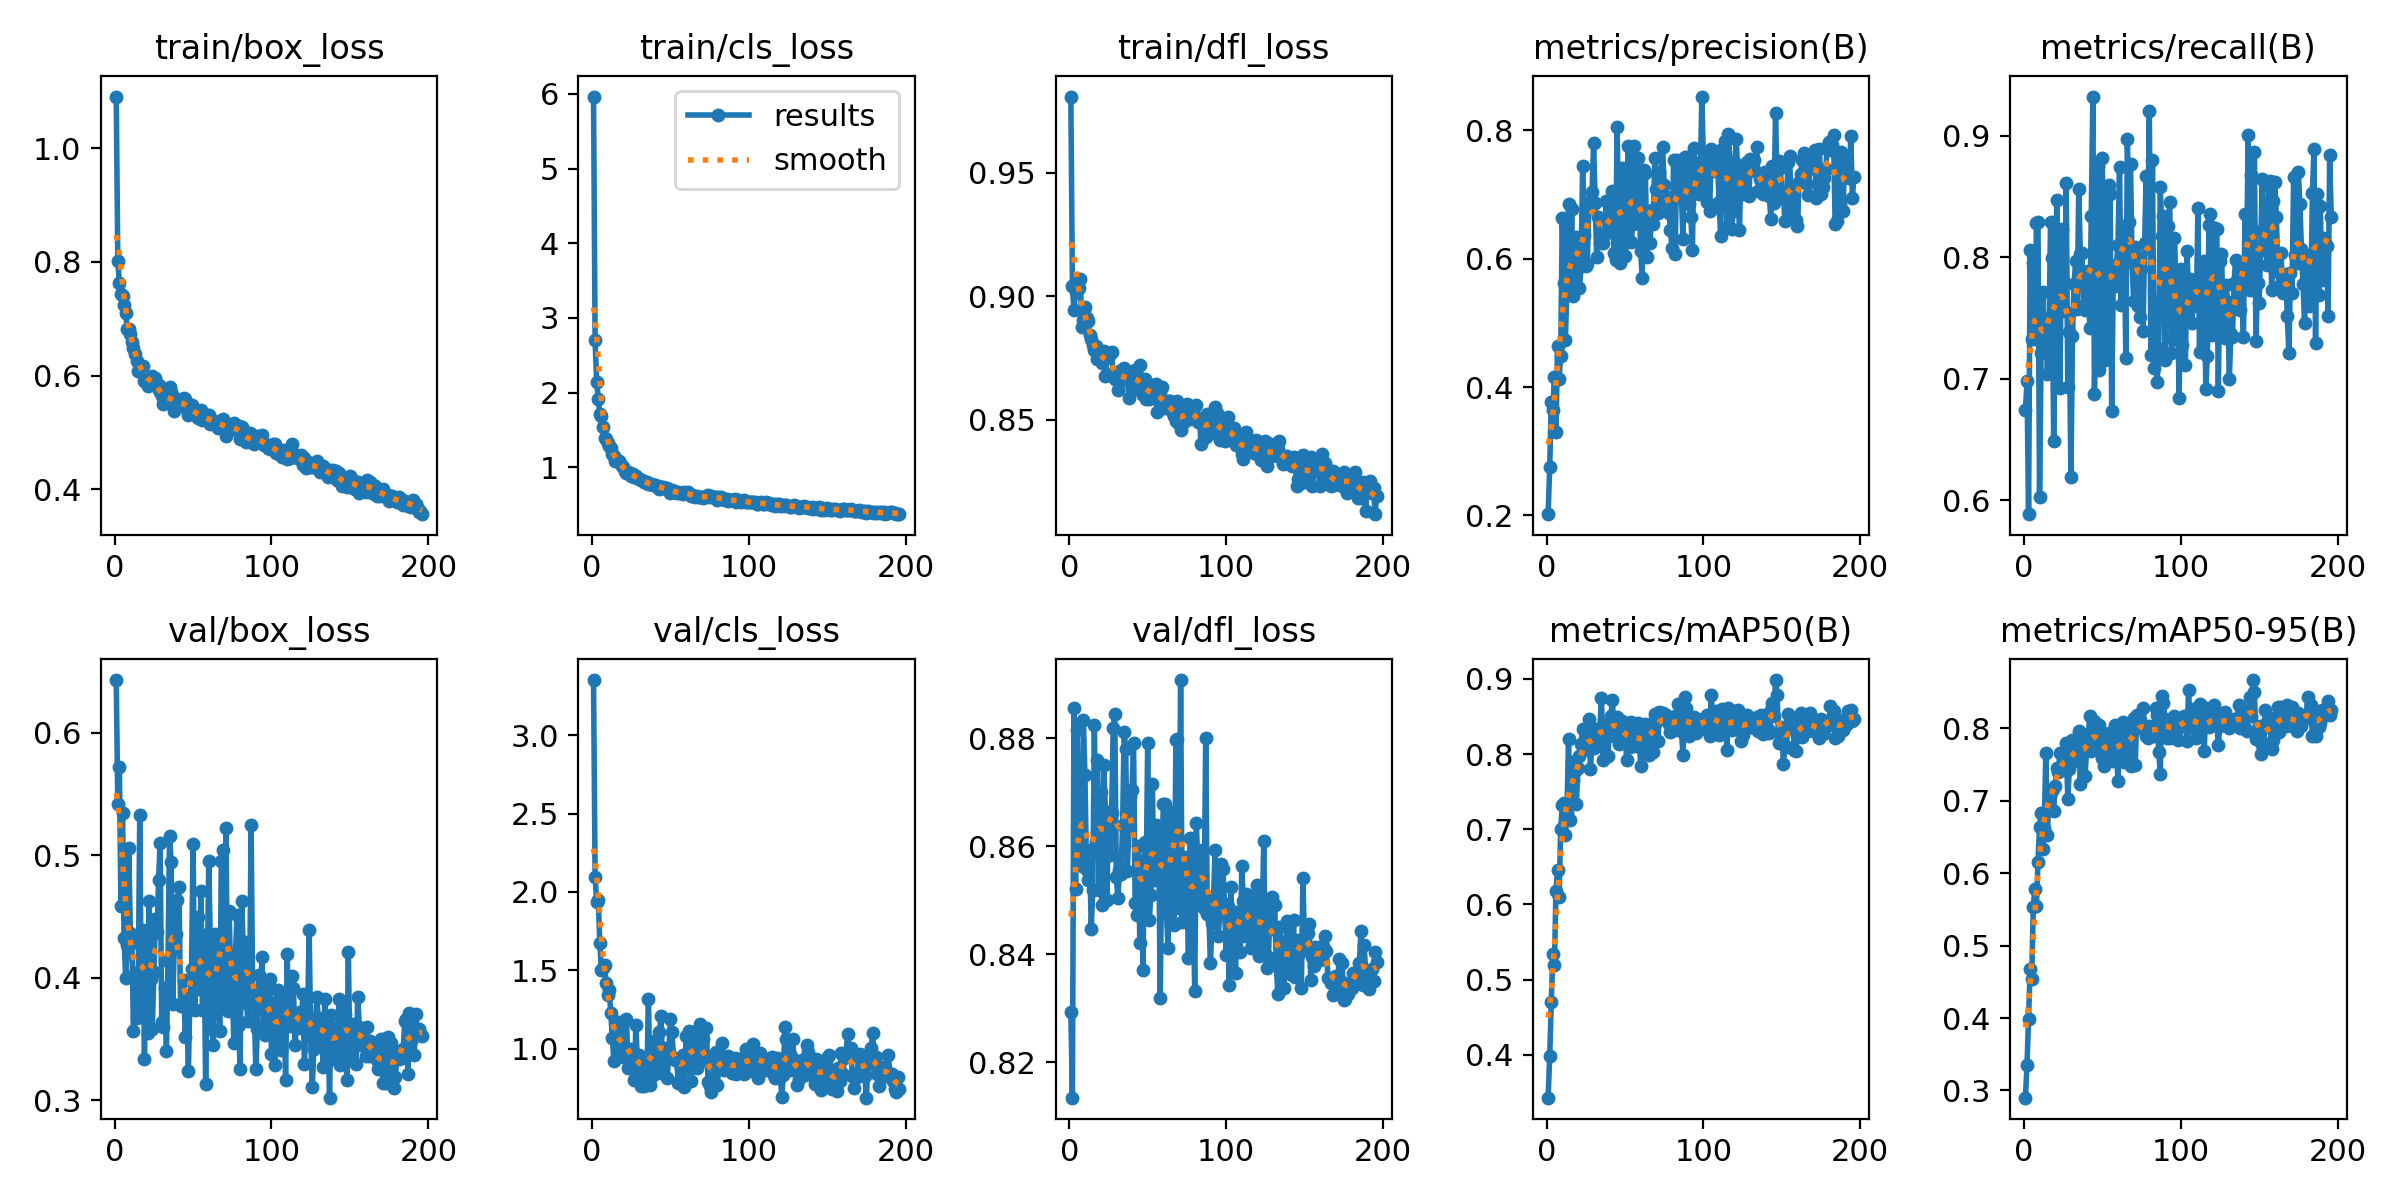

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train9/results.png', width=600)

/home/nitro/Studia/Wizja Komputerowa/ProjektV2


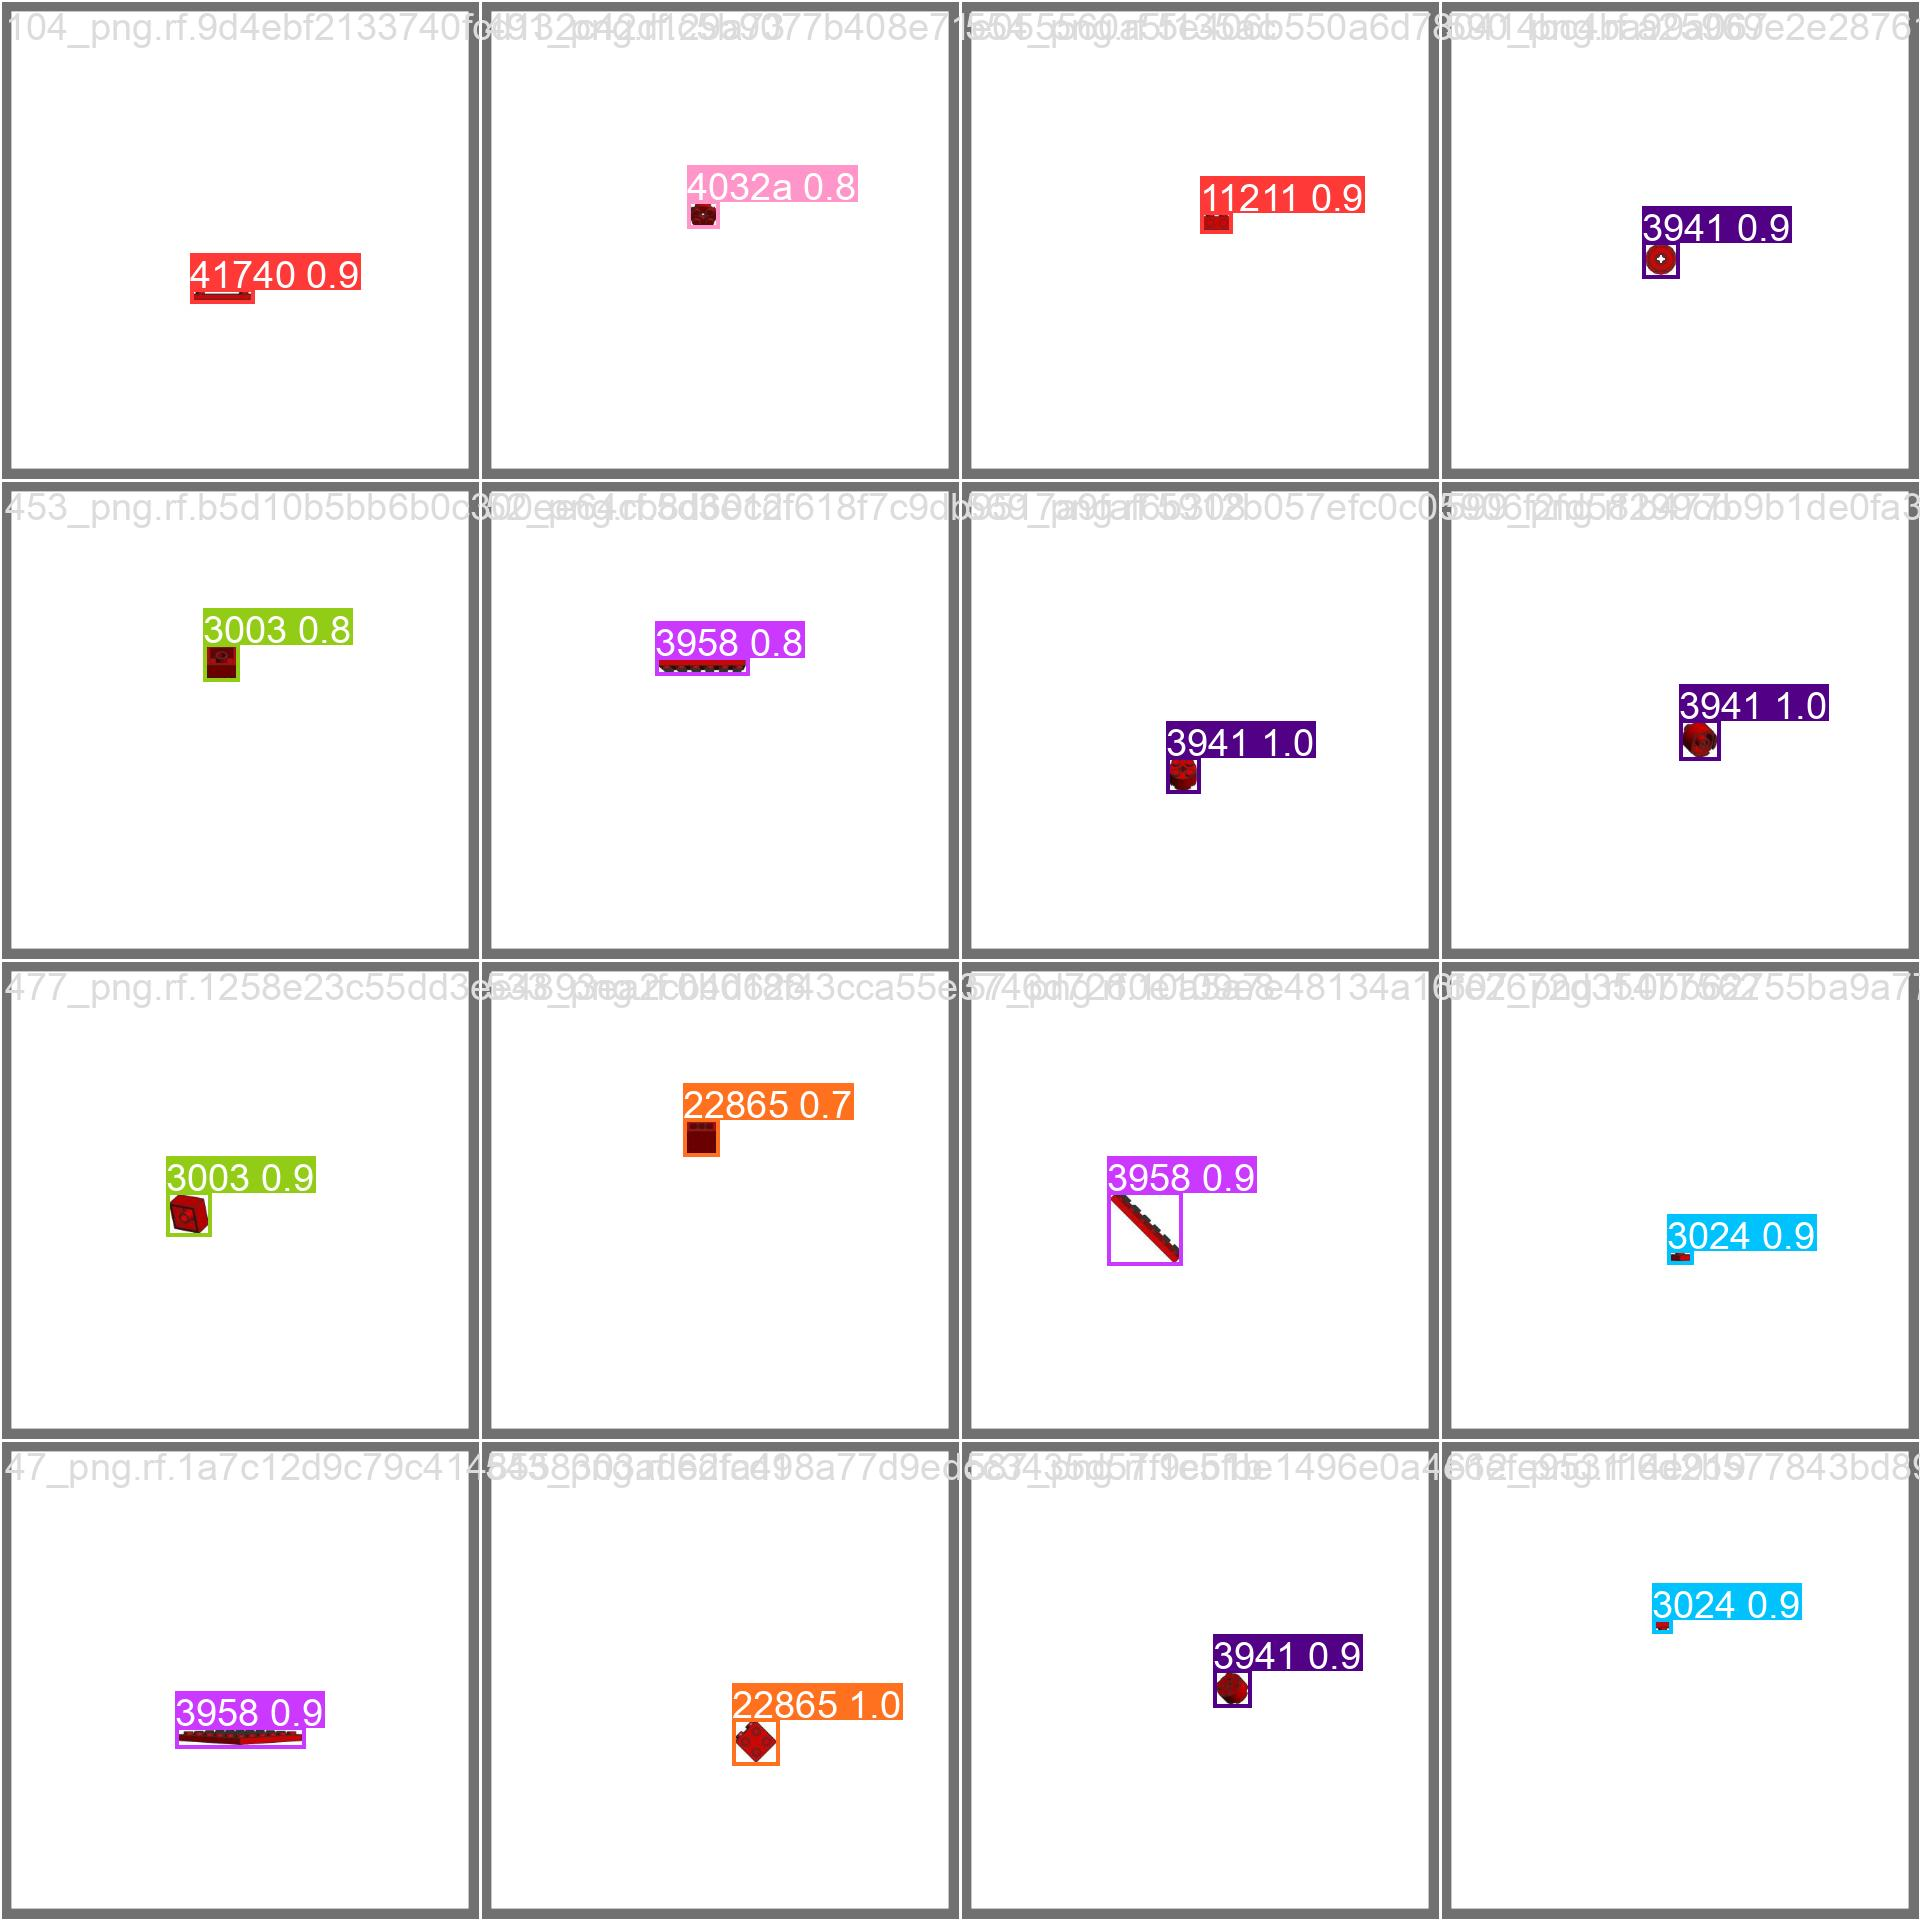

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train9/val_batch0_pred.jpg', width=600)

## Validate Custom Model

## Inference with Custom Model

In [16]:
%cd {HOME}
!yolo task=detect mode=predict model=runs/detect/train9/weights/best.pt conf=0.25 source=Lego--3/Lego--3/test/images save=True save_txt=True

/home/nitro/Studia/Wizja Komputerowa/ProjektV2
Ultralytics YOLOv8.0.237 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 7974MiB)
Model summary (fused): 168 layers, 11134098 parameters, 0 gradients, 28.5 GFLOPs

image 1/70 /home/nitro/Studia/Wizja Komputerowa/ProjektV2/Lego--3/Lego--3/test/images/108_png.rf.5e9687fa1b544560fb7070b16d28690e.jpg: 640x640 1 41740, 6.9ms
image 2/70 /home/nitro/Studia/Wizja Komputerowa/ProjektV2/Lego--3/Lego--3/test/images/130_png.rf.d5f74a2320aa9eca7c71ce26d070461e.jpg: 640x640 1 3070b, 6.9ms
image 3/70 /home/nitro/Studia/Wizja Komputerowa/ProjektV2/Lego--3/Lego--3/test/images/133_png.rf.e82ab91a6cf7d564938db13cfe1e6381.jpg: 640x640 1 3070b, 6.9ms
image 4/70 /home/nitro/Studia/Wizja Komputerowa/ProjektV2/Lego--3/Lego--3/test/images/138_png.rf.558b1c466ed8b2fc047ef4eaac8562d6.jpg: 640x640 1 3070b, 7.0ms
image 5/70 /home/nitro/Studia/Wizja Komputerowa/ProjektV2/Lego--3/Lego--3/test/images/13_png.rf.e8d2c0e5645784d4836bb620cfcf10

**NOTE:** Let's take a look at few results.

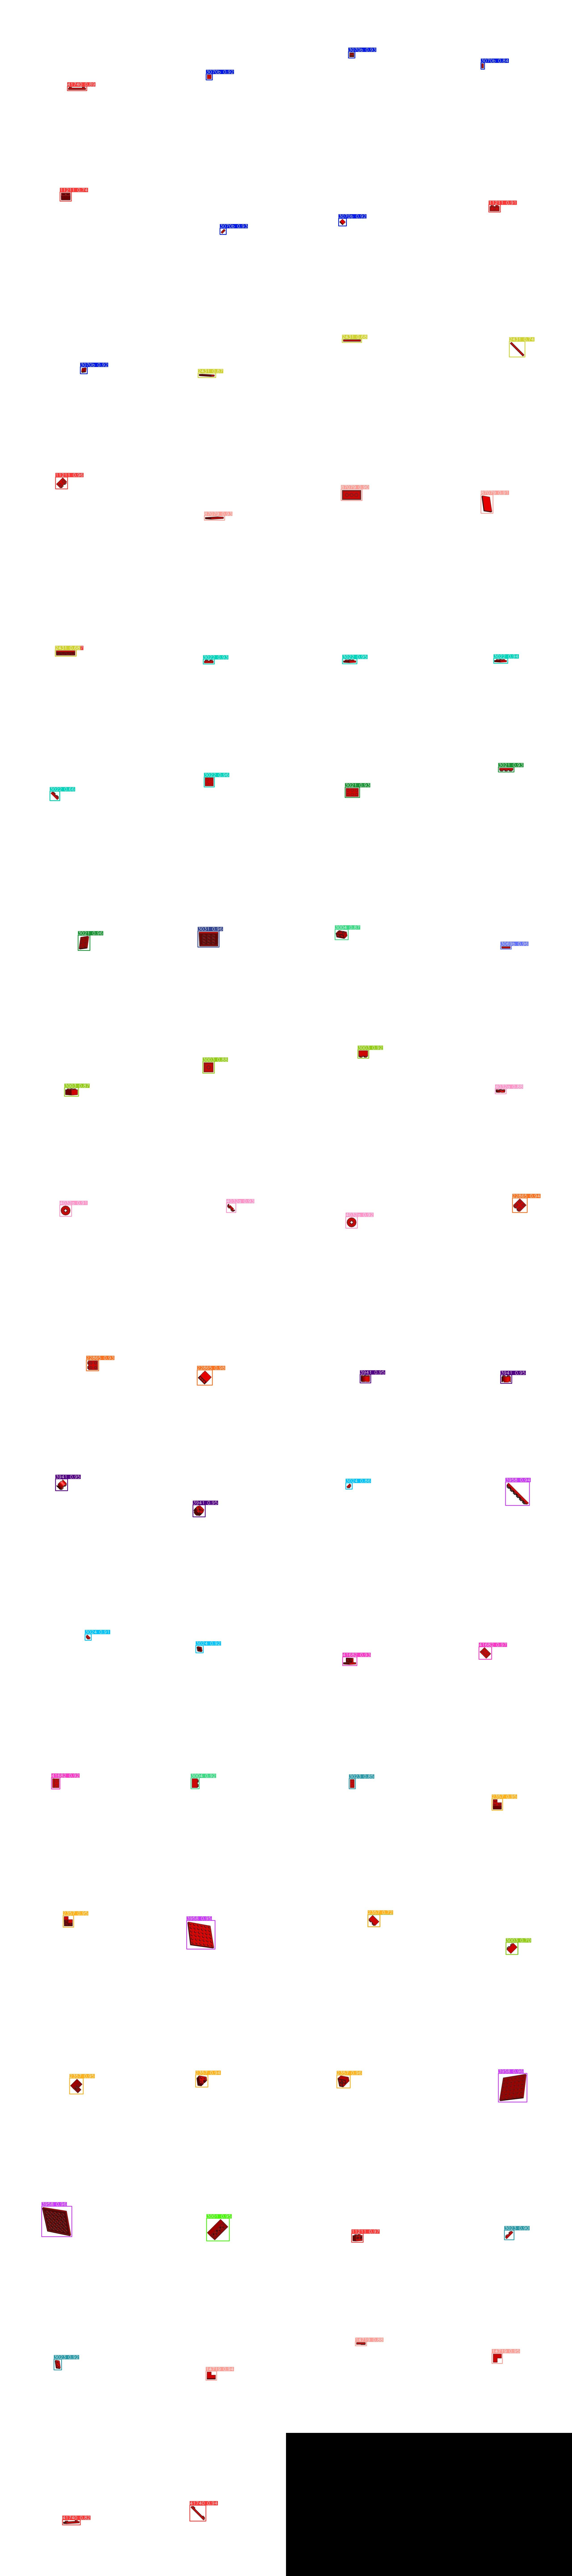

In [17]:
from PIL import Image as PILImage
import glob
from IPython.display import Image, display

folder_path = 'runs/detect/predict2/'
jpg_files = glob.glob(f'{folder_path}*.jpg')
jpg_files.sort()

columns = 4
rows = len(jpg_files) // columns + 1
image_width = 640
image_height = 640

grid_width = columns * image_width
grid_height = rows * image_height

merged_image = PILImage.new('RGB', (grid_width, grid_height))

for i, file_path in enumerate(jpg_files):
    image = PILImage.open(file_path)
    image = image.resize((image_width, image_height))
    row = i // columns
    col = i % columns
    merged_image.paste(image, (col * image_width, row * image_height))

merged_image.save("połączone_zdjęcie2.jpg")
display(Image(filename='połączone_zdjęcie2.jpg', width=600))

In [19]:
%cd {HOME}
!yolo task=detect mode=predict model=runs/detect/train9/weights/best.pt conf=0.25 source=toPredict save=True save_txt=True

/home/nitro/Studia/Wizja Komputerowa/ProjektV2
/home/nitro/miniconda3/envs/tf/lib/python3.10/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
Ultralytics YOLOv8.0.237 🚀 Python-3.10.13 torch-2.1.0+cu121 CPU (AMD Ryzen 7 5800H with Radeon Graphics)
Model summary (fused): 168 layers, 11134098 parameters, 0 gradients, 28.5 GFLOPs

image 1/3 /home/nitro/Studia/Wizja Komputerowa/ProjektV2/toPredict/411257931_743436093989092_469827436680480986_n.jpg: 480x640 1 14719, 2 2431s, 1 3004, 1 3069b, 1 3958, 1 4032a, 115.9ms
image 2/3 /home/nitro/Studia/Wizja Komputerowa/ProjektV2/toPredict/411285873_789912789564560_1074260704797066677_n.jpg: 480x640 1 14719, 2 2431s, 1 3004, 1 3031, 1 3

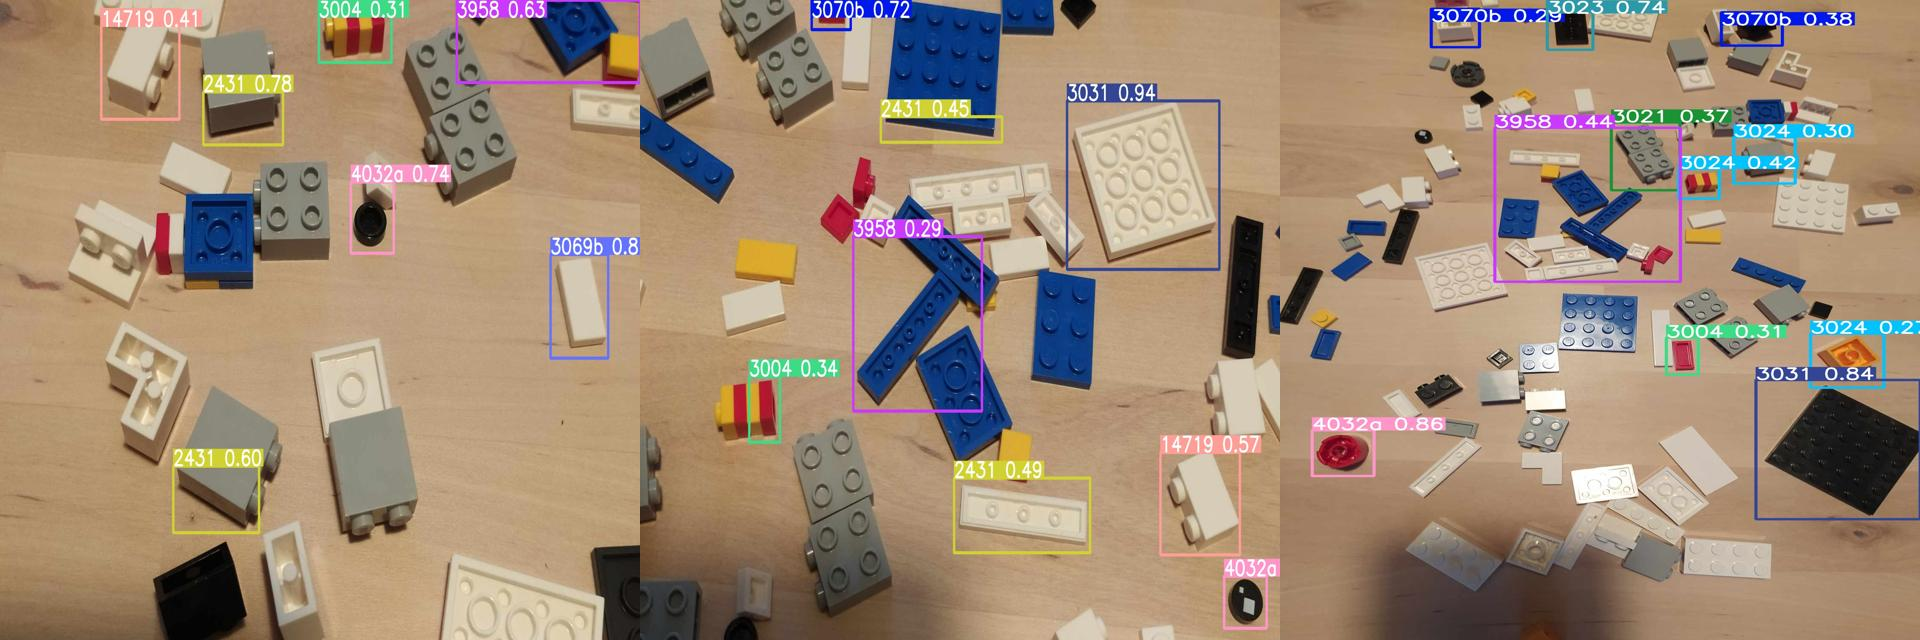

In [22]:
from PIL import Image as PILImage
import glob
from IPython.display import Image, display

folder_path = 'runs/detect/predict3/'
jpg_files = glob.glob(f'{folder_path}*.jpg')
jpg_files.sort()

columns = 3
rows = len(jpg_files) // columns + 1
rows = 1
image_width = 640
image_height = 640

grid_width = columns * image_width
grid_height = rows * image_height

merged_image = PILImage.new('RGB', (grid_width, grid_height))

for i, file_path in enumerate(jpg_files):
    image = PILImage.open(file_path)
    image = image.resize((image_width, image_height))
    row = i // columns
    col = i % columns
    merged_image.paste(image, (col * image_width, row * image_height))

merged_image.save("połączone_zdjęcie2.jpg")
display(Image(filename='połączone_zdjęcie2.jpg', width=600))